<h1 align="center">Email Spam Classification Using Machine Learning</h1>

![logo](Email.png)

# Data Importing & Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('spam_ham_dataset.csv', encoding='latin-1')

In [5]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df.shape

(5171, 4)

# Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


### Dropping less value columns

In [8]:
df.drop(columns = ['Unnamed: 0','label_num',], inplace=True)

In [9]:
df.sample(10)

,label,text
3515,spam,Subject: analyst ' s pick ( 23805 )\r\ninvesto...
5001,spam,Subject: borrow up to 125 % of your homes valu...
2563,spam,Subject: \r\nthis week only : f . ree gen . er...
2143,spam,Subject: italian rolex in throw away prices . ...
916,ham,"Subject: winter cap volumes\r\nnov 300 , 000 /..."
48,spam,Subject: instant download 1300 popular softwar...
1434,ham,Subject: deals to be extended on meter 985097 ...
4255,ham,Subject: tenaska iv 10 / 00\r\na revised amoun...
4761,spam,Subject: bigger is better\r\nyour woman needs ...
2721,ham,Subject: re : 02 / 00 natural gas nomination\r...


### column Rename for Better Understanding

In [10]:
df.rename(columns={'label':'target', 'text':'text'}, inplace=True)

In [11]:
df.head()

,target,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

#### ham = 0, spam = 1

In [14]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


#### Missing Values

In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

#### Checking for Duplicate Values

In [16]:
df.duplicated().sum()

178

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

# EDA

In [19]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [20]:
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x20094d39310>,
 [Text(-0.666498760406164, 0.8750882254818922, 'ham'),
  Text(0.6664986784744886, -0.8750882878840056, 'spam')],
 [Text(-0.36354477840336213, 0.4773208502628502, '70.72'),
  Text(0.36354473371335744, -0.4773208843003666, '29.28')])

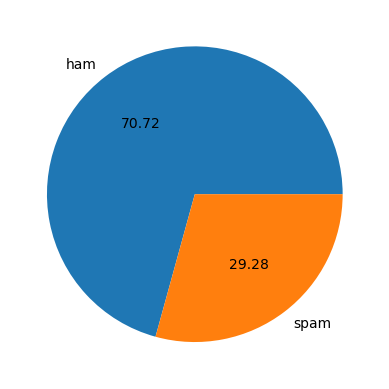

In [21]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')

##### Data imbalanced due to ham % high

# Making new columns for deeper analysis by using nltk library

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


In [26]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,1
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,20
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,10.202884
std,1547.863387,340.702932,22.003030
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,3.000000
50%,557.000000,125.000000,6.000000
75%,1262.000000,288.000000,12.000000
max,32258.000000,8863.000000,1163.000000


#### Descride funtion for Ham messages

In [31]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,8.804871
std,1402.785831,337.018933,22.303918
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,3.000000
50%,538.000000,128.000000,5.000000
75%,1253.500000,298.500000,10.000000
max,32258.000000,8863.000000,1163.000000


In [32]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,13.579343
std,1840.112883,349.439381,20.883535
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,3.000000
50%,589.000000,119.500000,8.000000
75%,1305.000000,252.750000,15.000000
max,22073.000000,3963.000000,331.000000


#### Plotting the histogram on the bases of the ham & spam

#### ham = 0, spam = 1 ----- Histogram based on number of Characters

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

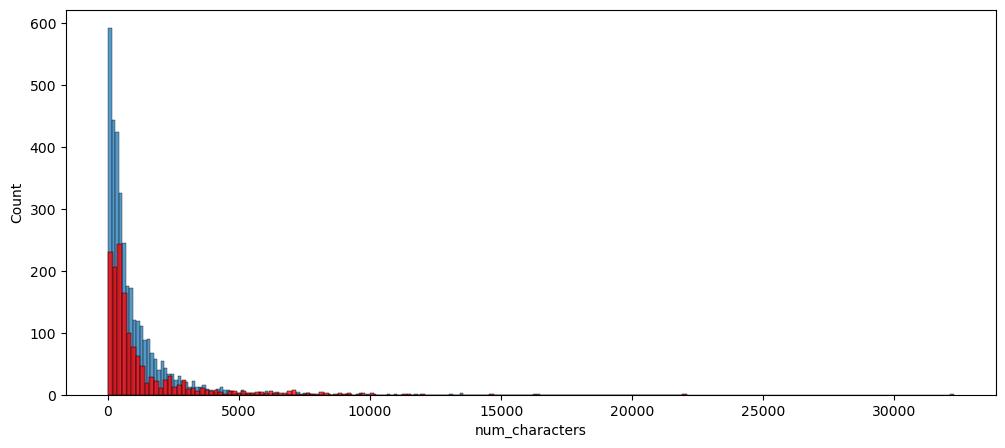

In [33]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

#### Histogram based on number of words

<AxesSubplot:xlabel='num_words', ylabel='Count'>

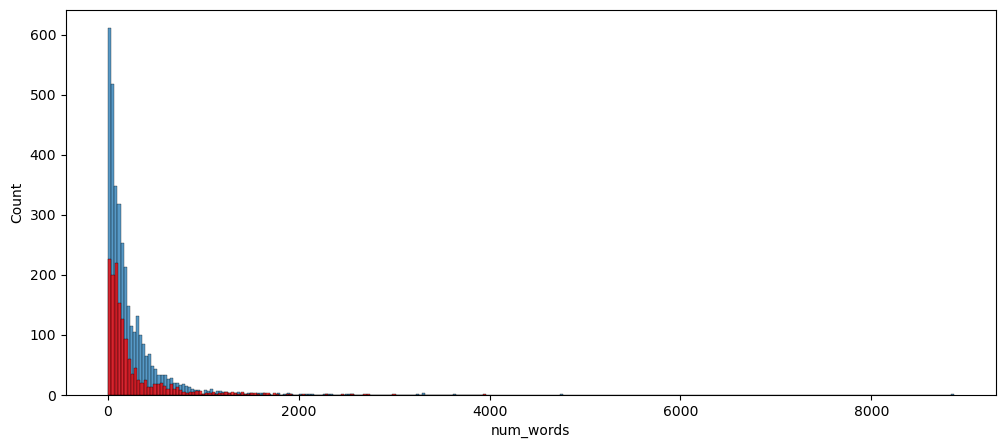

In [34]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

#### Histogram based on number of sentences

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

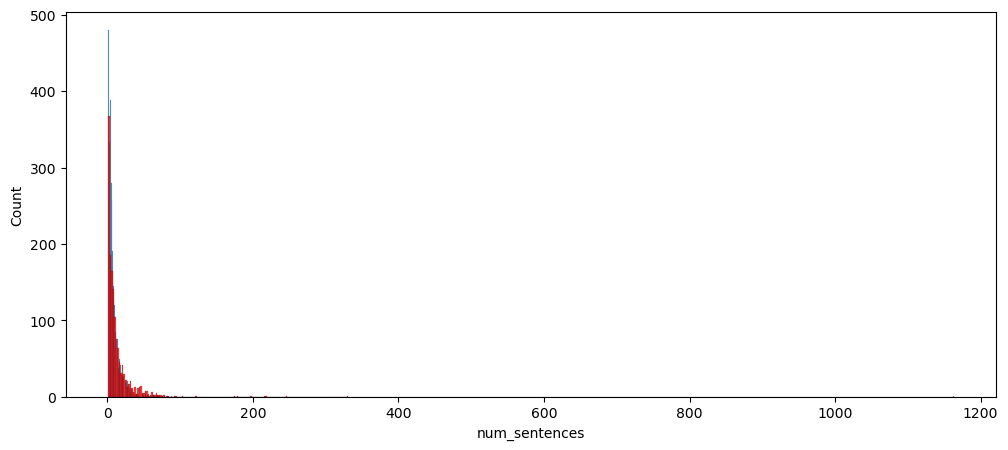

In [35]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color='red')

### By the pair plot we found some outliers

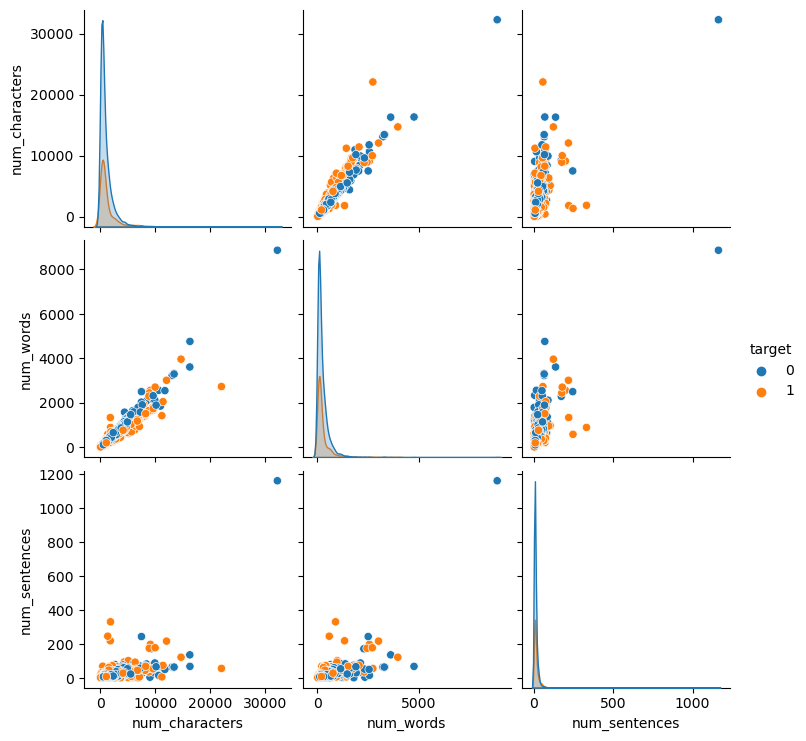

In [36]:
sns.pairplot(df, hue='target')

#### To find the correlation i have plot the heat map

<AxesSubplot:>

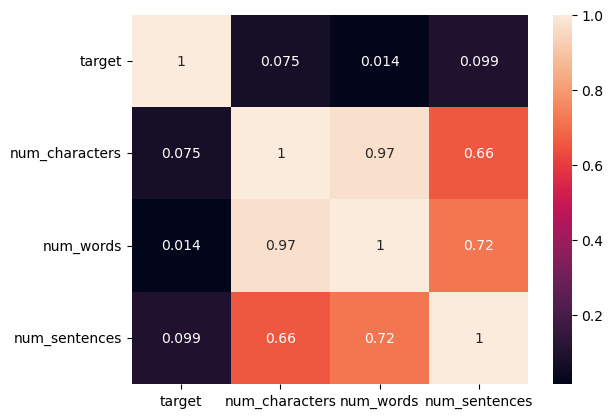

In [37]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

- Lower casing text
- Tokenization
- Removing special character
- Removing stop_words and Punctuations
- Stemming

In [38]:
 def transform_text(text):
        text = text.lower()
        text = nltk.word_tokenize(text)
        
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
                
        text = y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
        text = y[:]
        y.clear()
        
        for i in text:
            y.append(PorterStemmer().stem(i))
            
        return " ".join(y)
        

In [39]:
df['transformed_text']= df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,1,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


#### WordCloud

In [41]:
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

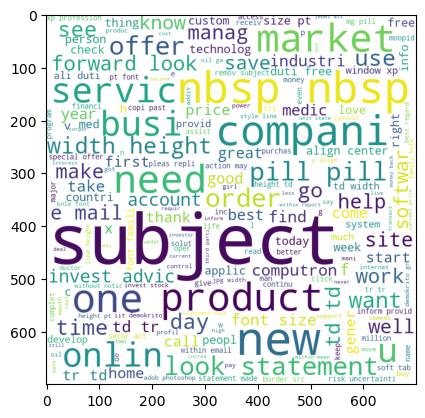

In [43]:
plt.imshow(spam_wc)

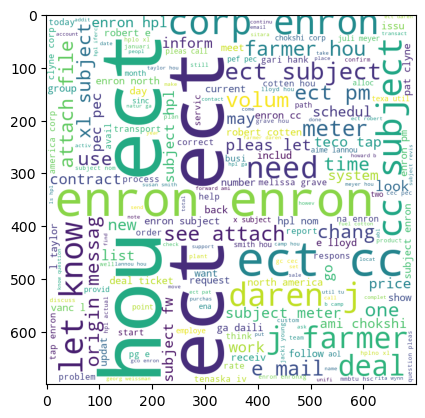

In [44]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

#### Find the most common words in the spam messages

In [45]:
spam_corpus = []
for mgs in df[df['target'] == 1]['transformed_text'].tolist():
    for word in mgs.split():
        spam_corpus.append(word)
len(spam_corpus)

196592

In [46]:
from collections import Counter

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

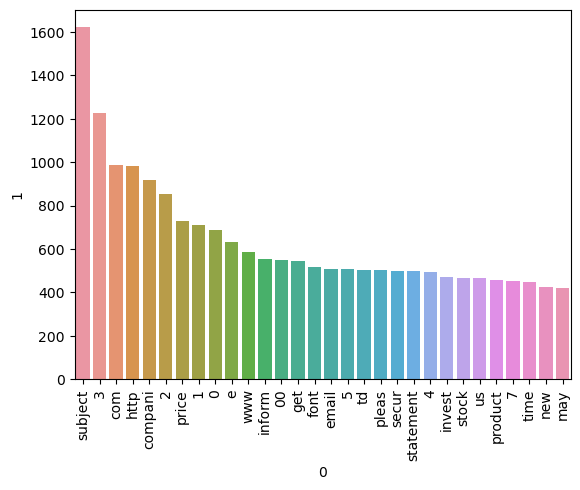

In [47]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

#### Find the most common words in the ham messages

In [48]:
ham_corpus = []
for mgs in df[df['target'] == 0]['transformed_text'].tolist():
    for word in mgs.split():
        ham_corpus.append(word)
len(ham_corpus)

380475

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

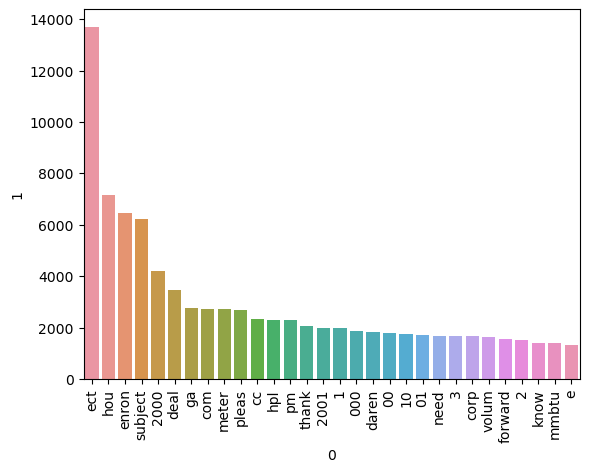

In [49]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

# Model Building

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
X.shape

(4993, 3000)

In [53]:
y = df['target'].values

In [54]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9679679679679679
[[687  17]
 [ 15 280]]
0.9427609427609428


In [60]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9569569569569569
[[665  39]
 [  4 291]]
0.8818181818181818


In [61]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9419419419419419
[[656  48]
 [ 10 285]]
0.8558558558558559


#### Find the best model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [64]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [66]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.978978978978979, 0.9506578947368421)

In [67]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.978978978978979
Precision -  0.9506578947368421


C:\Users\tejas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.965965965965966
Precision -  0.9453924914675768
For  NB
Accuracy -  0.9569569569569569
Precision -  0.8818181818181818
For  DT
Accuracy -  0.8318318318318318
Precision -  0.6487119437939111
For  LR
Accuracy -  0.9569569569569569
Precision -  0.89375
For  RF
Accuracy -  0.970970970970971
Precision -  0.9433333333333334
For  AdaBoost
Accuracy -  0.944944944944945
Precision -  0.8896103896103896
For  BgC
Accuracy -  0.953953953953954
Precision -  0.9249146757679181
For  ETC
Accuracy -  0.974974974974975
Precision -  0.944078947368421
For  GBDT
Accuracy -  0.9479479479479479
Precision -  0.900990099009901


In [68]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.978979,0.950658
1,KN,0.965966,0.945392
8,ETC,0.974975,0.944079
5,RF,0.970971,0.943333
7,BgC,0.953954,0.924915
9,GBDT,0.947948,0.900990
4,LR,0.956957,0.893750
6,AdaBoost,0.944945,0.889610
2,NB,0.956957,0.881818
3,DT,0.831832,0.648712


In [69]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [70]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.978979
1,KN,Accuracy,0.965966
2,ETC,Accuracy,0.974975
3,RF,Accuracy,0.970971
4,BgC,Accuracy,0.953954
5,GBDT,Accuracy,0.947948
6,LR,Accuracy,0.956957
7,AdaBoost,Accuracy,0.944945
8,NB,Accuracy,0.956957
9,DT,Accuracy,0.831832


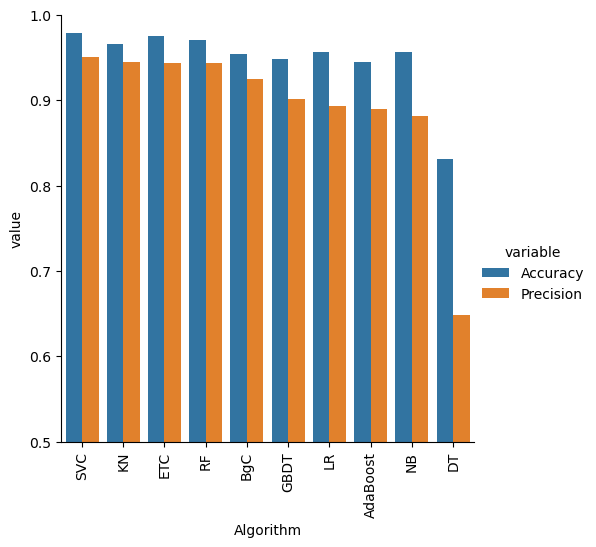

In [71]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement

In [72]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [73]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [74]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [75]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [77]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.978979,0.950658,0.978979,0.950658,0.978979,0.950658,0.978979,0.950658
1,KN,0.965966,0.945392,0.965966,0.945392,0.965966,0.945392,0.965966,0.945392
2,ETC,0.974975,0.944079,0.974975,0.944079,0.974975,0.944079,0.974975,0.944079
3,RF,0.970971,0.943333,0.970971,0.943333,0.970971,0.943333,0.970971,0.943333
4,BgC,0.953954,0.924915,0.953954,0.924915,0.953954,0.924915,0.953954,0.924915
5,GBDT,0.947948,0.900990,0.947948,0.900990,0.947948,0.900990,0.947948,0.900990
6,LR,0.956957,0.893750,0.956957,0.893750,0.956957,0.893750,0.956957,0.893750
7,AdaBoost,0.944945,0.889610,0.944945,0.889610,0.944945,0.889610,0.944945,0.889610
8,NB,0.956957,0.881818,0.956957,0.881818,0.956957,0.881818,0.956957,0.881818
9,DT,0.831832,0.648712,0.831832,0.648712,0.831832,0.648712,0.831832,0.648712


# Voting Classifier

In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [79]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [80]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [81]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9819819819819819
Precision 0.948220064724919


# Applying stacking

In [82]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [83]:
from sklearn.ensemble import StackingClassifier


In [84]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [85]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.980980980980981
Precision 0.96


In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))